<a href="https://colab.research.google.com/github/saritmaitra/Momentum/blob/main/SupportResistance_Experimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.transforms as transform
import matplotlib.gridspec as gridspec
import pandas as pd
from pandas.tseries.offsets import MonthEnd
pd.options.mode.chained_assignment = None
pd.set_option('use_inf_as_na', True)

     |████████████████████████████████| 6.3MB 15.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=85b8ed77d2e04e0ee3ea59c346f485cbbc020d4cd80bd08ff42121b75583f025
  Stored in directory: /root/.cache/pip/wheels/fe/a0/79/b73d4a0c535b421b88fc7b393936b371fabbfeaf979eca4050
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


[*********************100%***********************]  1 of 1 completed

18.45: 2017-01-23 00:00:00
19.35: 2017-02-02 00:00:00
22.85: 2017-03-03 00:00:00
20.0: 2017-04-10 00:00:00
19.7: 2017-04-19 00:00:00
22.35: 2017-05-22 00:00:00
23.2: 2017-06-08 00:00:00
23.1: 2017-06-26 00:00:00
24.05: 2017-07-06 00:00:00
21.9: 2017-07-25 00:00:00
10.6: 2017-09-13 00:00:00
11.4: 2017-10-12 00:00:00
9.9: 2017-10-30 00:00:00
9.9: 2017-11-16 00:00:00
10.0: 2017-12-11 00:00:00
16.3: 2018-01-23 00:00:00
16.1: 2018-02-06 00:00:00
17.2: 2018-02-26 00:00:00
17.75: 2018-03-15 00:00:00
18.5: 2018-04-16 00:00:00
18.25: 2018-04-27 00:00:00
19.95: 2018-05-23 00:00:00
16.75: 2018-06-29 00:00:00
16.3: 2018-07-16 00:00:00
18.7: 2018-08-20 00:00:00
18.5: 2018-09-05 00:00:00
17.25: 2018-09-25 00:00:00
16.87: 2018-10-08 00:00:00
15.66: 2018-10-25 00:00:00
15.22: 2018-11-09 00:00:00
14.69: 2018-12-11 00:00:00
13.67: 2019-01-24 00:00:00
13.57: 2019-02-14 00:00:00
13.75: 2019-02-26 00:00:00
14.18: 2019-03-26 00:00:00
12.1

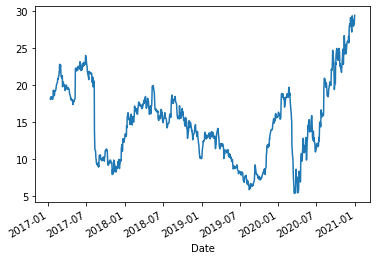

In [2]:
ticker = "SGRY"
start_date = dt.datetime(2010,12,31)
end_date = dt.datetime(2020,12,31)
class DataBase():
  def __init__(self, ticker, days):
    self.ticker = ticker
    data = yf.download(ticker, start = start_date, end =end_date )
    self.df = pd.DataFrame(data)
    pd.set_option("display.max_columns", None)
    self.df[self.df.index.dayofweek < 5]
    self.df= self.df[-days:]

  def quote(self):
    return self.df

db = DataBase(ticker, 1000)
df = db.quote()
# print(df.tail())

df['High'].plot(Label='High')
pivots = [] # pivot values we will calculate
dates = []
counter = 0 # how many days have occured since a max has happened
lastPivot = 0 # last pivot value

Range = [0,0,0,0,0,0,0,0,0,0]
dateRange = [0,0,0,0,0,0,0,0,0,0]

df.reset_index(inplace = True)
for i in df.index:
  currentMax = max(Range, default = 0)
  value = round(df['High'][i], 2)

  Range = Range[1:9]
  Range.append(value)
  dateRange = dateRange[1:9]
  dateRange.append(i)

  if currentMax == max(Range, default=0):
    counter += 1
  else: 
    counter = 0

  if counter == 5:
    lastPivot = currentMax
    dateloc = Range.index(lastPivot)
    lastDate=df['Date'][i]
    pivots.append(lastPivot)
    dates.append(lastDate)

print()
# print(str(pivots))
# print(str(dates))
timeD = dt.timedelta(days = 30)

for index in range(len(pivots)):
  print(str(pivots[index]) + ": " + str(dates[index]))

  # plt.plot_date([dates['Date']+dates['Date']+timeD],
  #                [pivots['Date'], pivots['Date']], linestyle = "-",
  #              linewidth = 2, marker = ',')

  

plt.show()

Buy & Hold Strategy return & risk: 12.09 % and 77.55%
Support & Resistance Strategy return & risk: -47.2 % and 77.48%


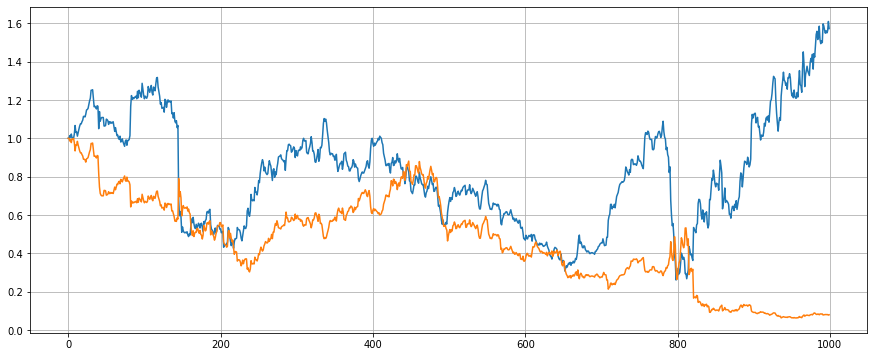

In [3]:
import numpy as np

fee = 0.0005 # 500 basis point
# thresholds
sr_sell = 0.5
sr_buy = 0.5

df['returns'] = df['Adj Close'].pct_change()
df['scaled_price'] = df['Adj Close'] / 10**np.floor(np.log10(df['Adj Close'])) # converting Adj Close price between 1 & 10 
df['S&R'] = df['scaled_price']%1
df['signal'] = 1*(df['S&R'] < sr_buy) - 1*(df['S&R'] > sr_sell)

# daily ret
BuyHold_ret = np.array(df['returns'][1:])
SR_ret = np.array(df['returns'][1:]) * np.array(df['signal'][:-1]) - fee*abs(np.array(df['signal'][1:]) - np.array(df['signal'][:-1]))

# annualized ret
BuyHold = np.prod(1 + BuyHold_ret )** (252/len(BuyHold_ret)) -1
SR = np.prod(1 + SR_ret )** (252/len(SR_ret)) -1

BuyHold_risk = np.std(BuyHold_ret)*(252)**(1/2)
SR_risk =  np.std(SR_ret)*(252)**(1/2)

print('Buy & Hold Strategy return & risk: '+str(round(BuyHold*100, 2)) +' % and '+str(round(BuyHold_risk*100, 2))+'%')
print('Support & Resistance Strategy return & risk: '+str(round(SR*100, 2)) +' % and '+str(round(SR_risk*100, 2))+'%')

plt.figure(figsize = (15,6))
plt.plot(np.append(1, np.cumprod(1+BuyHold_ret)))
plt.plot(np.append(1, np.cumprod(1+SR_ret)))
plt.grid(True); plt.show()

In [5]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (yf.download(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers=["SGRY", "NTRA", "Z", "FATE", "DIS", "GM", 'BPMC', "PTC"]
start = dt.datetime(2020,12,31)
end = dt.datetime.now()
all_data = get(tickers, start, end)
all_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
SGRY   2020-12-31   28.180000   29.215000   27.639999   29.010000   29.010000   
       2021-01-04   29.450001   30.240000   26.420000   27.600000   27.600000   
       2021-01-05   27.420000   29.270000   27.420000   28.590000   28.590000   
       2021-01-06   29.260000   31.365000   29.260000   30.650000   30.650000   
       2021-01-07   31.000000   31.620001   29.450001   30.250000   30.250000   
...                       ...         ...         ...         ...         ...   
PTC    2021-07-12  145.500000  145.649994  142.500000  142.880005  142.880005   
       2021-07-13  142.880005  143.880005  141.419998  143.059998  143.059998   
       2021-07-14  144.130005  144.130005  141.770004  142.570007  142.570007   
       2021-07-15  141.919998  142.630005  139.830002  141.279999  141.279999   
       2021-07-16  141.990005  142.740005  139.729996  140.199997  140.199997   

                   Volume  
Ticker Date                
SGRY   2020-12-31  344600  
       2021-01-04  445500  
       2021-01-05  254400  
       2021-01-06  363900  
       2021-01-07  255200  
...                   ...  
PTC    2021-07-12  504600  
       2021-07-13  348000  
       2021-07-14  358100  
       2021-07-15  386800  
       2021-07-16  469600  

[1088 rows x 6 columns]